# 필요 패키지 정의

In [1]:
# 필요한 라이브러리 임포트
import os
import io
from PIL import Image
import base64
from pathlib import Path
from langchain_core.documents import Document
import matplotlib.pyplot as plt
import torch
from getpass import getpass

# hwp 파일 로더
from llama_index.readers.file import HWPReader
from helper_hwp import hwp_to_txt, hwp_to_markdown, HwpDocument

# pdf 파일 로더
from langchain_community.document_loaders import PyMuPDFLoader
import fitz  # 텍스트 및 이미지 추출을 위한 라이브러리
import camelot  # 테이블 추출을 위한 라이브러리

# OCR
try:
    import pytesseract
    from paddleocr import PaddleOCR

    print("OCR is available")
    OCR_AVAILABLE = True
except Exception:
    print("OCR is not available")
    OCR_AVAILABLE = False

# OpenAI로 캡션 생성 (LangChain)
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

/home/public/public_venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'validate_default' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'validate_default' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(


GITHUB_URL = https://github.com/c0z0c/helper_hwp


/home/public/public_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Checking connectivity to the model hosters, this may take a while. To bypass this check, set `DISABLE_MODEL_SOURCE_CHECK` to `True`.


OCR is available


# 한글 폰트 오류 로그 제거용

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done


Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/cMap
	/usr/share/fonts/cmap
	/usr/share/fonts/truetype
	/usr/share/fonts/cmap/adobe-cns1
	/usr/share/fonts/cmap/adobe-gb1
	/usr/share/fonts/cmap/adobe-japan1
	/usr/share/fonts/cmap/adobe-japan2
	/usr/share/fonts/cmap/adobe-korea1
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/libreoffice
	/usr/share/fonts/truetype/nanum
	/usr/share/fonts/truetype/noto
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new

# 데이터 경로 정의

In [3]:
DATA_DIR = Path("/home/public/data/raw_data")
n_samples = 1

# OpenAI API 키 입력

In [4]:
os.environ["OPENAI_API_KEY"] = getpass("OpenAI API Key: ")

# 한글 파일 로더가 읽은 데이터 시각화

## 한글 파일만 리스트로 저장

In [5]:
hwp_docs = []
for fp in DATA_DIR.glob("**/*"):
    if fp.suffix.lower() in [".hwp"]:
        hwp_docs.append(fp)

In [6]:
len(hwp_docs)

96

## llama_index 로더 사용시 데이터 형식 확인

In [7]:
for i in range(n_samples):
    hwp_fp = hwp_docs[i]
    print(f"Processing file: {hwp_fp}")
    reader = HWPReader()
    docs = reader.load_data(file=hwp_fp)
    print(len(docs))
    print(docs)
    print(docs[0].text_resource.text)
    # for j, doc in enumerate(docs):
    #     print(f"--- Document {j} ---")
    #     print(doc.page_content)  # Print first 500 characters of the document
    #     print("\n")

Processing file: /home/public/data/raw_data/한국원자력연구원_한국원자력연구원 선량평가시스템 고도화.hwp
1
[Document(id_='003045d8-03e6-49ee-af67-6a839f2ad5d0', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='\x02捤獥\x00\x00\x00\x00\x02\x02汤捯\x00\x00\x00\x00\x02\x15湰灧\x00\x00\x00\x00\x15\x15桤灧\x00\x00\x00\x00\x15\x15桤灧\x00\x00\x00\x00\x15\x0b氠瑢\x00\x00\x00\x00\x0b\r\n1\r\n사업 안내\r\n\x15湯湷\x00\x00\x00\x00\x151.1 사업 개요\r\n가. 사업명 : 한국원자력연구원 선량평가시스템 고도화\r\n나. 사업 기간 : 계약일로부터 6개월\r\n다. 사업비 : 금 46,600 천원 (부가가치세 포함)\r\n라. 입찰방법 : 제한경쟁입찰\r\n○ 「소프트웨어산업진흥법 제24조의2 제2항」 및 「대기업인 소프트웨어 사업자가 참여할 수 있는 사업금액의 하한」에 따라 중소기업간 제한경쟁입찰\r\n마. 계약방법 : 협상에 의한 계약 (기술평가90%, 가격평가10%)\r\n○ 「국가를 당사자로 하는 계약에 관한 법률시행령 제43조(협상에 의한 계약체결) 및 제43조의2(지식기반사업의 계약방법)」에 의거 “협상에 의한 계약체결” 방법을 적용 \r\n1.2. 추진배경 및 필요성\r\n가. 규제요건 준수 필요\r\n○ 원

## helper_hwp 사용시 데이터 형식 확인

In [8]:
for i in range(n_samples):
    hwp_fp = hwp_docs[i]
    print(f"Processing file: {hwp_fp}")

    # Convert HWP to TXT
    txt_fp = hwp_to_txt(hwp_fp)
    print(f"Converted to TXT {i + 1}:\n{txt_fp}")

    md_fp = hwp_to_markdown(hwp_fp)
    print(f"Converted to Markdown {i + 1}:\n{md_fp}")

Processing file: /home/public/data/raw_data/한국원자력연구원_한국원자력연구원 선량평가시스템 고도화.hwp
Converted to TXT 1:
1
사업 안내
1.1 사업 개요
가. 사업명 : 한국원자력연구원 선량평가시스템 고도화
나. 사업 기간 : 계약일로부터 6개월
다. 사업비 : 금 46,600 천원 (부가가치세 포함)
라. 입찰방법 : 제한경쟁입찰
○ 「소프트웨어산업진흥법 제24조의2 제2항」 및 「대기업인 소프트웨어 사업자가 참여할 수 있는 사업금액의 하한」에 따라 중소기업간 제한경쟁입찰
마. 계약방법 : 협상에 의한 계약 (기술평가90%, 가격평가10%)
○ 「국가를 당사자로 하는 계약에 관한 법률시행령 제43조(협상에 의한 계약체결) 및 제43조의2(지식기반사업의 계약방법)」에 의거 “협상에 의한 계약체결” 방법을 적용
1.2. 추진배경 및 필요성
가. 규제요건 준수 필요
○ 원자력안전위원회고시 제2019-10호 ｢방사선방호 등에 관한 기준｣ 제16조(환경상의 위해방지)에서 제시하는 제한구역경계에서의 연간선량 준수 여부를 확인할 수 있는 체계 구축 필요
○ ICRP60 기반 평가장기 개선 필요
○ 액체유출물에 의한 주민피폭선량평가 수행 필요
나. 업무생산성 향상 필요
○ UI 개선을 통한 업무개선 및 신속한 의사결정 환경 구축 필요
○ 출력 기능 고도화를 통한 생산성 향상 필요
1.3. 사업 범위
가. 평가장기(Organ) 개선
○ 포트란 모듈 평가장기 개선
○ 웹시스템 평가장기 개선
나. 액체유출물에 의한 선량평가 기능 추가
○ 포트란 모듈 액체 선량평가 추가
○ 웹시스템 액체 선량평가 추가
1.4. 기대 효과
○ 정상운전 시 선량평가 관련 규제 수요에 대응
○ 선량평가 시스템 고도화를 통한 데이터 신뢰성 확보 및 생산성 향상
2
대상 업무 현황
2.1. 일반 현황
2.1.1. 설립 목적 및 근거
○ 설립 목적
- 원자력의 연구∙개발을 종합적

Converted to Markdown 1:
| 1 |
| --- |
|  |
| 사업 안내 |

### 1.1 사업 개요

가. 사업명 : 한국원자력연구원 선량평가시스템 고도화

나. 사업 기간 : 계약일로부터 6개월

다. 사업비 : 금 46,600 천원 (부가가치세 포함)

라. 입찰방법 : 제한경쟁입찰

○ 「소프트웨어산업진흥법 제24조의2 제2항」 및 「대기업인 소프트웨어 사업자가 참여할 수 있는 사업금액의 하한」에 따라 중소기업간 제한경쟁입찰

마. 계약방법 : 협상에 의한 계약 (기술평가90%, 가격평가10%)

○ 「국가를 당사자로 하는 계약에 관한 법률시행령 제43조(협상에 의한 계약체결) 및 제43조의2(지식기반사업의 계약방법)」에 의거 “협상에 의한 계약체결” 방법을 적용

### 1.2. 추진배경 및 필요성

가. 규제요건 준수 필요

○ 원자력안전위원회고시 제2019-10호 ｢방사선방호 등에 관한 기준｣ 제16조(환경상의 위해방지)에서 제시하는 제한구역경계에서의 연간선량 준수 여부를 확인할 수 있는 체계 구축 필요

○ ICRP60 기반 평가장기 개선 필요

○ 액체유출물에 의한 주민피폭선량평가 수행 필요

나. 업무생산성 향상 필요

○ UI 개선을 통한 업무개선 및 신속한 의사결정 환경 구축 필요

○ 출력 기능 고도화를 통한 생산성 향상 필요

### 1.3. 사업 범위

가. 평가장기(Organ) 개선

○ 포트란 모듈 평가장기 개선

○ 웹시스템 평가장기 개선

나. 액체유출물에 의한 선량평가 기능 추가

○ 포트란 모듈 액체 선량평가 추가

○ 웹시스템 액체 선량평가 추가

### 1.4. 기대 효과

○ 정상운전 시 선량평가 관련 규제 수요에 대응

○ 선량평가 시스템 고도화를 통한 데이터 신뢰성 확보 및 생산성 향상

| 2 |
| --- |
|  |
| 대상 업무 현황 |

### 2.1. 일반 현황

2.1.1. 설립 목적 및 근거

○ 설립 목적

- 원자력의 연구∙개발을 종합적으로 수행하여 학술의 진보, 에너지 확보

In [9]:
documents = HwpDocument(hwp_docs[0])
print(documents)
for a in documents._iter_sequential():
    print(a[0].name)

HwpDocument(file='/home/public/data/raw_data/한국원자력연구원_한국원자력연구원 선량평가시스템 고도화.hwp', version=5.0.3.4, sections=2)
PARAGRAPH
PICTURE
PICTURE
PAGE_NUM_POS
COMMENT
COMMENT
TABLE
PAGE_NUM_POS
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
COMMENT
NEW_NUMBER
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
TABLE
COMMENT
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
TABLE
PARAGRAPH
PICTURE
EQUATION
PARAGRAPH
TABLE
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
PARAGRAPH
TABLE
PARAGRAPH
PICTURE
PARAGRAP

In [10]:
paragraphs = []
pictures = []
tables = []
for a in documents._iter_sequential():
    if a[0].name == "PARAGRAPH":
        paragraphs.append(a[1].text)
    elif a[0].name == "PICTURE":
        pictures.append(a[1])
    elif a[0].name == "TABLE":
        tables.append(a[1])
print(f"Number of paragraphs: {len(paragraphs)}")
print(f"Number of pictures: {len(pictures)}")
print(f"Number of tables: {len(tables)}")

print(f"paragraphs: {"\n".join(paragraph for paragraph in paragraphs)}")
print(f"First picture: {pictures[0]}")
print(f"First table: {tables[0]}")

Number of paragraphs: 2522
Number of pictures: 33
Number of tables: 87
paragraphs: 
1

사업 안내


1.1 사업 개요
가. 사업명 : 한국원자력연구원 선량평가시스템 고도화
나. 사업 기간 : 계약일로부터 6개월
다. 사업비 : 금 46,600 천원 (부가가치세 포함)
라. 입찰방법 : 제한경쟁입찰
○ 「소프트웨어산업진흥법 제24조의2 제2항」 및 「대기업인 소프트웨어 사업자가 참여할 수 있는 사업금액의 하한」에 따라 중소기업간 제한경쟁입찰
마. 계약방법 : 협상에 의한 계약 (기술평가90%, 가격평가10%)
○ 「국가를 당사자로 하는 계약에 관한 법률시행령 제43조(협상에 의한 계약체결) 및 제43조의2(지식기반사업의 계약방법)」에 의거 “협상에 의한 계약체결” 방법을 적용
1.2. 추진배경 및 필요성
가. 규제요건 준수 필요
○ 원자력안전위원회고시 제2019-10호 ｢방사선방호 등에 관한 기준｣ 제16조(환경상의 위해방지)에서 제시하는 제한구역경계에서의 연간선량 준수 여부를 확인할 수 있는 체계 구축 필요
○ ICRP60 기반 평가장기 개선 필요
○ 액체유출물에 의한 주민피폭선량평가 수행 필요
나. 업무생산성 향상 필요
○ UI 개선을 통한 업무개선 및 신속한 의사결정 환경 구축 필요
○ 출력 기능 고도화를 통한 생산성 향상 필요
1.3. 사업 범위
가. 평가장기(Organ) 개선
○ 포트란 모듈 평가장기 개선
○ 웹시스템 평가장기 개선
나. 액체유출물에 의한 선량평가 기능 추가
○ 포트란 모듈 액체 선량평가 추가
○ 웹시스템 액체 선량평가 추가
1.4. 기대 효과
○ 정상운전 시 선량평가 관련 규제 수요에 대응
○ 선량평가 시스템 고도화를 통한 데이터 신뢰성 확보 및 생산성 향상


2

대상 업무 현황

2.1. 일반 현황
2.1.1. 설립 목적 및 근거
○ 설립 목적
- 원자력의 연구∙개발을 종합적으로 수행하여 학술의 진보, 에너지 확보 및 원자력의 이용을 촉진하는데 기여
○ 설립 근

- 공통점
    - hwp_to_txt, hwp_to_markdown 함수는 이미지는 읽지 못함
    - 두 함수 모두 전체 문서를 하나의 텍스트로 읽어옴
- 차이점
    - hwp_to_txt는 테이블상에 존재하는 텍스트만 읽어오지만, hwp_to_markdown는 테이블의 구조를 마크다운형식으로 그대로 가져오는 것을 확인할 수 있었음

# PDF 파일 로더가 읽은 데이터 시각화

## pdf 파일만 리스트로 저장

In [11]:
pdf_docs = []
for fp in DATA_DIR.glob("**/*"):
    if fp.suffix.lower() in [".pdf"]:
        pdf_docs.append(fp)

In [12]:
len(pdf_docs)

4

## fitz 사용시 텍스트, 이미지 데이터 형식 확인

### 텍스트 데이터 확인

In [13]:
for i in range(n_samples):
    pdf_fp = pdf_docs[i]
    print(f"Processing file: {pdf_fp}")
    with fitz.open(pdf_fp) as doc:
        end = doc.page_count
        print(f"doc: {doc}")
        print(f"doc 메타데이터: {doc.metadata}")
        print(f"doc 페이지 수: {end}")
        for i in range(end):
            page = doc.load_page(i)
            text = page.get_text("text").strip()
            print(f"--- Page {i + 1} ---")
            print(text)
            if not text:
                continue

Processing file: /home/public/data/raw_data/고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf
doc: Document('/home/public/data/raw_data/고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf')
doc 메타데이터: {'format': 'PDF 1.7', 'title': '신규 콘텐츠 설명', 'author': '김미선', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word Microsoft 365용', 'producer': 'Microsoft® Word Microsoft 365용', 'creationDate': "D:20240701105604+09'00'", 'modDate': "D:20240701105604+09'00'", 'trapped': '', 'encryption': None}
doc 페이지 수: 297
--- Page 1 ---
-1- 
 
 
 
제 안 요 청 서 
 
 
고려대학교  
차세대 포털·학사 정보시스템 구축 사업 
 
 
 
 
 
 
 
 
2024. 7. 01 
 
 
 
 
 
 
 
 
※ 본 자료는 제안내용의 설명을 위한 배포자료로, 이외 목적으로 무단복제, 전달 및 사용하는 행위를 금함.
--- Page 2 ---
-2- 
 
 
 
 
 
목   차   
Ⅰ. 사업개요 ··················································································································  4 
1. 사업 개요 ··············································································································  4 
2.

--- Page 26 ---
-26- 
 
 
 
 
 
  
 
 
① 외국인학생 비자관리 정보화 지원 
② 외국인학생/어학연수생 관련 수작업 개선 
③ 외국인 학생/교원 맞춤형 영어서비스 지원 
④ 한국어과정 시스템 고도화 
 
 
 
   ❏ 국제교류협약관리 / 교류프로그램 관리 정보화 미흡 
   ❍ 국제교류 관련 프로그램 운영(신청-접수-등록) 수작업 발생 
   ❍ 해외대학과의 교육 협약관리 기능 미흡
--- Page 27 ---
-27- 
 
 
 
 
 
 
① 해외 학생이 참여하는 프로그램의 신청-접수 수작업/시스템 연계 개선 
② 해외 대학 정보 관리 / ③ 해외 대학과의 협약 정보 관리 
 
 
 
   ❏ 학내 시스템 간 정보 연계 미흡 
   ❍ 개별 부서 도입, 시스템 구축 환경 차이, 연계 표준 미적용 등으로 
학사행정시스템과 관련 시스템 간 데이터 연계 미흡, 업무 비효율 발생 
  
 
 
① 학사행정시스템과 유관 시스템 간 연계 개선 
 
 
 
   ❏ 정보시스템의 학생 편의/민원 지원 미흡 
   ❍ 학생 문의에 대한 부서 민원 대응 한계, 통합 조회/신청 등 학생 편의 지원 미흡 
   ❍ 상담지원, 장애학생지원 등 학생 요구를 해소할 수 있는 정보시스템 지원 필요
--- Page 28 ---
-28- 
 
 
 
 
 
  
 
 
① 학생 민원 및 요구에 대응하는 정보시스템 지원(민원, 상담, 장애학생지원 등) 
 
 
 
라. 전자계약시스템 
   ❏ 오프라인 계약으로 인한 행정 낭비 초래 
   ❍ 물품 구매 및 공사/용역의 다수 계약을 오프라인으로 수행하여 행정업무 
비효율과 실물계약서 발생에 따른 자원 낭비를 초래 
   ❍ 교원임용, 직원채용 등 인사 계약을 오프라인으로 수행 
① 계약 당사자 간 전자적으로 처리할 수 있는 계약기능 구축 
② 각종 계약서 양식 관리, 계약서 송부-검토-날인 기능 구현 
③ 계약 / 계약 변경 이력 관리 
④ 위원회 등 다양한 서명 업무에 적용할 수 있는 전자서명 기능 구축 
⑤

### 이미지 데이터 확인

In [14]:
img_dir = Path("/home/public/data/processed/test_imgs")

Processing file: /home/public/data/raw_data/고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf
doc: Document('/home/public/data/raw_data/고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf')
doc 메타데이터: {'format': 'PDF 1.7', 'title': '신규 콘텐츠 설명', 'author': '김미선', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word Microsoft 365용', 'producer': 'Microsoft® Word Microsoft 365용', 'creationDate': "D:20240701105604+09'00'", 'modDate': "D:20240701105604+09'00'", 'trapped': '', 'encryption': None}
doc 페이지 수: 297
page 17 layout: None
page 17 images: [(18, 0, 141, 40, 8, 'DeviceRGB', '', 'Image18', 'FlateDecode', 0), (101, 0, 538, 255, 8, 'DeviceRGB', '', 'Image101', 'DCTDecode', 0), (102, 0, 538, 255, 8, 'DeviceRGB', '', 'Image102', 'FlateDecode', 0)]
--- Image 1 ---
xref: 18
base: {'width': 141, 'height': 40, 'ext': 'png', 'colorspace': 3, 'xres': 96, 'yres': 96, 'bpc': 8, 'size': 7220, 'image': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x8d\x00\x00\x00(\x08\x02\x00

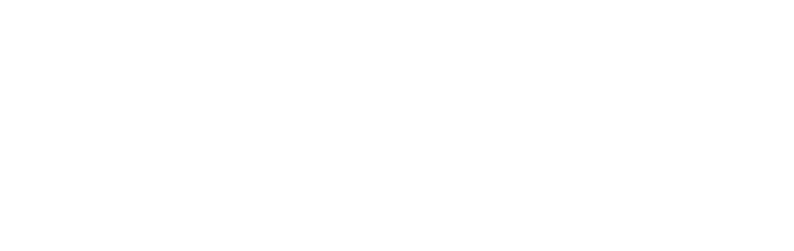

In [15]:
for i in range(n_samples):
    pdf_fp = pdf_docs[i]
    pdf_fp = Path(pdf_fp)
    print(f"Processing file: {pdf_fp}")
    with fitz.open(pdf_fp) as doc:
        end = doc.page_count
        print(f"doc: {doc}")
        print(f"doc 메타데이터: {doc.metadata}")
        print(f"doc 페이지 수: {end}")

        p = 16
        page = doc.load_page(p)

        layout = page.get_layout()  # 레이아웃 정보를 가져옴
        print(f"page {p+1} layout: {layout}")

        images = page.get_images(full=True)
        print(f"page {p+1} images: {images}")

        plt.figure(figsize=(10, 3))
        for j, img in enumerate(images):
            print(f"--- Image {j + 1} ---")
            xref = img[0]
            print(f"xref: {xref}")
            base = doc.extract_image(xref)
            print(f"base: {base}")
            img_bytes = base["image"]
            bbox = page.get_image_bbox(img)
            print(f"page {p+1}, image {j + 1} bbox: {bbox}")
            ext = base.get("ext", "png")
            img_file = img_dir / f"{pdf_fp.stem}_p{p+1}_img{j+1}.{ext}"
            img_file.parent.mkdir(parents=True, exist_ok=True)
            if img_file.exists():
                continue
            else:
                img_file.write_bytes(img_bytes)
            # 이미지 시각화를 위한 코드
            plt.subplot(1, len(images), j + 1)
            plt.title(f"Page {p+1}, Image {j + 1}")
            plt.axis("off")
            plt.imshow(Image.open(io.BytesIO(img_bytes)))
            # print(f"img_bytes: {img_bytes}")
            ext = base.get("ext", "png")
            print(f"ext: {ext}")

        plt.axis("off")
        plt.show()

### OCR 및 캡션 생성 확인

#### 읽어온 이미지 저장

In [16]:
img_list = []
for fp in img_dir.glob("**/*"):
    if fp.suffix.lower() in [".png", ".jpg", ".jpeg"]:
        img_list.append(fp)

#### OCR 실행 함수 정의 및 실행

/home/public/data/processed/test_imgs/고려대학교_차세대 포털·학사 정보시스템 구축사업_p17_img2.jpeg OCR result
eu 사용권한가        9104.05 Bae Bei
pth Gass        = ie
aa                 i     I
aga 888     a      액할업무:     oe
nen    =
개              3
zal   iE
Lge Hs         10199
wove 282% gunn 128

sons OB

ㆍ AMS/GMSSl BEE] Att
Bol 권한관리 제계가 온전히
wa Seo gow

+ GMS AB Relea ot BO
BS 후 사용자이 AER
Bete WHO BEE 학무.
cies, 재학. ge, 직원. 재직 동
사용자 SOME BOS FOIE
wae

+ 현재 ae 요정 80148 많이
와서 Awe 통리 sae =
있도록 UE 종이 있음



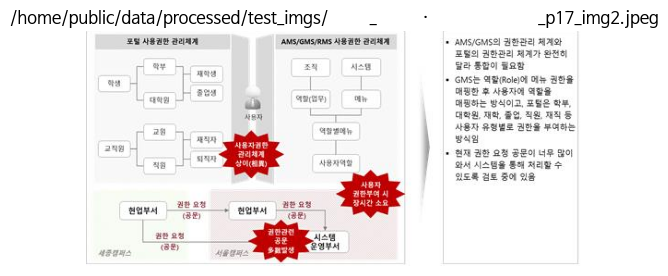

/home/public/data/processed/test_imgs/고려대학교_차세대 포털·학사 정보시스템 구축사업_p17_img3.png OCR result
+ auee sue NEA
은) sees 8              Bee aes
Beep
가 ane
apa avauae aes
버

 다국어 XIE 현재 Be 미뉴와
7                                               S827 많이 부족한 wae
20a 동일한 수준으로

+ poate a8 화원 a7,          Qooseueaae

ween ages 있음
&   Oo           + Bal me 크기가 %<기반에
교정되어 있어 작은 크기의
Kiem aun 0 205로        되바이스인 경우 매번 화면 wt
동의 풀월요한 Sue WEIS

' 학생의 요정에 의한 SAV HBOS 점검                                iad
cusiasnsesasancencen GSS



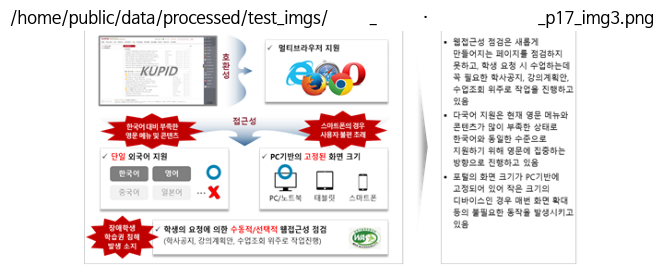

/home/public/data/processed/test_imgs/고려대학교_차세대 포털·학사 정보시스템 구축사업_p17_img1.png OCR result
고려대학교

KOREA UNIVERSITY



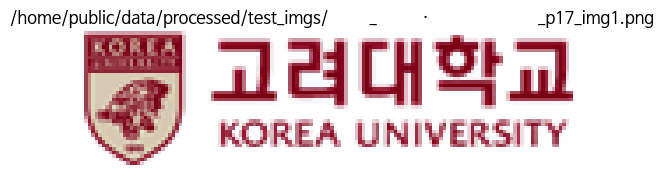

In [17]:
def _run_ocr(image_path: Path) -> str:
    """
    OCR을 실행하여 이미지에서 텍스트를 추출합니다.
    - image_path: 이미지 파일 경로
    - return: 추출된 텍스트
    """
    if not OCR_AVAILABLE:
        return ""
    img = Image.open(image_path).convert("RGB")
    txt = (pytesseract.image_to_string(img, lang="kor+eng") or "").strip()
    return txt if len(txt) >= 5 else ""


for img_path in img_list:
    print(f"{img_path} OCR result\n{_run_ocr(img_path)}\n")
    plt.title(f"{img_path}")
    plt.imshow(Image.open(img_path))
    plt.axis("off")
    plt.show()

- 이미지가 복잡하면 OCR 성능이 매우 안좋아지는 것을 확인할 수 있음
pytesseract가 아닌 

In [18]:
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False,
)

Error: Can not import paddle core while this file exists: /home/public/public_venv/lib/python3.12/site-packages/paddle/base/libpaddle.so


ImportError: libnvrtc.so.13: cannot open shared object file: No such file or directory

#### 캡션 생성 함수 정의 및 실행

In [ ]:
def _image_to_data_url(image_path: Path) -> str:
    """
    이미지를 base64 인코딩된 data URL로 변환합니다.
    - image_path: 이미지 파일 경로
    - return: data URL
    """
    ext = image_path.suffix.lower().lstrip(".") or "png"
    mime = "image/png" if ext in ["png"] else "image/jpeg"
    b64 = base64.b64encode(image_path.read_bytes()).decode("utf-8")
    return f"data:{mime};base64,{b64}"

In [ ]:
def _run_openai_caption_ko(
    caption_prompt_ko: str, _openai: ChatOpenAI, image_path: Path
) -> str:
    """
    OpenAI를 사용하여 이미지에 대한 한국어 캡션을 생성합니다.
    - image_path: 이미지 파일 경로
    - return: 생성된 캡션
    """
    data_url = _image_to_data_url(image_path)

    # OpenAI 비전 입력: content blocks (text + image_url) :contentReference[oaicite:2]{index=2}
    msg = HumanMessage(
        content=[
            {"type": "text", "text": caption_prompt_ko},
            {"type": "image_url", "image_url": {"url": data_url}},
        ]
    )

    resp = _openai.invoke([msg])
    return (resp.content or "").strip()

/home/public/data/processed/test_imgs/고려대학교_차세대 포털·학사 정보시스템 구축사업_p17_img2.jpeg caption
그림은 포털 사용자권한 관리체계(사용자유형별 권한 부여: 학부·대학원·재학·졸업 등)와 AMS/GMS/RMS 관리자체계(조직·시스템 중심, 역할(Role)→메뉴→사용자 매핑)를 비교한 도표입니다. 주요 구성요소는 조직/시스템, 역할·권한, 현업부서의 권한요청(공문), 시스템운영부서로의 승인 흐름입니다. 핵심 의미: 권한관리 방식이 상이해 통합·연계가 필요하며, 현재 공문 기반 권한 요청이 많아 서비스화(자동화) 검토가 필요하다는 점이 RFP의 주요 요구사항입니다.



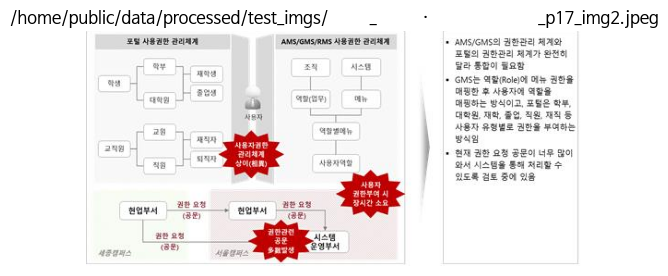

/home/public/data/processed/test_imgs/고려대학교_차세대 포털·학사 정보시스템 구축사업_p17_img3.png caption
그림은 학습플랫폼의 호환성·접근성 문제와 점검 한계를 정리한 도표입니다. 핵심 구성요소:
- 호환성: 멀티브라우저 필요(IE/Chrome/Firefox 등)
- 언어지원: 단일 외국어(한국어 위주) 한계
- 화면크기: PC기반 고정 레이아웃, 모바일 미고려
- 접근성 점검: 수동·선택적(학생 요청 기반), 동적 페이지 미점검
- 운영·지원 부족: 메뉴·콘텐츠 제작자 교육·지원 미흡
RFP 관점: 멀티브라우저·다국어·반응형 UI, 자동화된 접근성 점검·제작자 교육 요구.



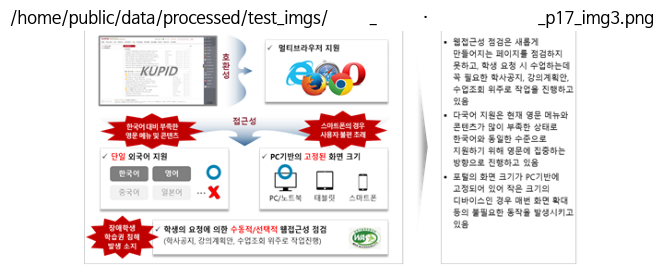

/home/public/data/processed/test_imgs/고려대학교_차세대 포털·학사 정보시스템 구축사업_p17_img1.png caption
요청하신 기준에 따라 안내드립니다. 해당 그림이 RFP 문서 분석과 직접 관련이 없어 설명을 제공하지 않습니다. RFP 관련 도표·표·흐름도·아키텍처 그림을 올려주시면 핵심 구성요소(항목/축/범례/단계)와 의미를 500자 이내로 요약해 드리겠습니다.



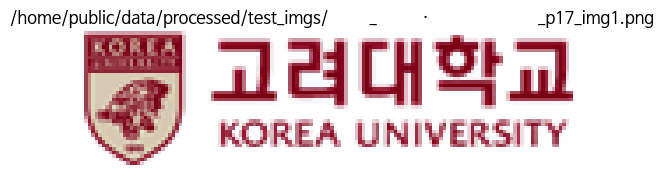

In [ ]:
caption_prompt_ko: str = (
    "이 그림을 한국어로 500자 이내로 간단히 설명해 주세요."
    "도표/표/흐름도/아키텍처 그림이라면 핵심 구성요소(항목/축/범례/단계)와 의미를 요약해 주세요. "
    "RFP 문서 분석에 도움이 되도록 핵심 정보만 정리해 주세요."
    "RFP 문서와 관련이 없는 그림이라면 설명하지 마세요."
)
llm = ChatOpenAI(
    model="gpt-5-mini",
    temperature=0.0,
)
for img_path in img_list:
    print(
        f"{img_path} caption\n{_run_openai_caption_ko(caption_prompt_ko, llm, img_path)}\n"
    )
    plt.title(f"{img_path}")
    plt.imshow(Image.open(img_path))
    plt.axis("off")
    plt.show()

## camelot 사용시 데이터 확인

## PyMuPDFLoader 사용시 데이터 형식 확인

In [ ]:
for i in range(n_samples):
    pdf_fp = pdf_docs[i]
    print(f"Processing file: {pdf_fp}")

    # Convert PDF to TXT
    loader = PyMuPDFLoader(pdf_fp)
    documents = loader.load()
    print(f"Number of documents: {len(documents)}")
    for doc in documents:
        print(f"Converted to Documents {i + 1}:\n{doc.page_content}")

Processing file: /home/public/data/raw_data/고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf


Number of documents: 297
Converted to Documents 1:
-1- 
 
 
 
제 안 요 청 서 
 
 
고려대학교  
차세대 포털·학사 정보시스템 구축 사업 
 
 
 
 
 
 
 
 
2024. 7. 01 
 
 
 
 
 
 
 
 
※ 본 자료는 제안내용의 설명을 위한 배포자료로, 이외 목적으로 무단복제, 전달 및 사용하는 행위를 금함.
Converted to Documents 1:
-2- 
 
 
 
 
 
목   차   
Ⅰ. 사업개요 ··················································································································  4 
1. 사업 개요 ··············································································································  4 
2. 사업 배경 ··············································································································  4 
3. 사업 범위 ··············································································································  5 
4. 기대효과 ···············································································································  7 
 
Ⅱ. 현황 및 문제점 ····································································································

- loader가 생성한 documents 확인 결과 pdf 파일의 페이지마다 하나의 Document를 생성
- 테이블을 읽어오긴 하지만 테이블 내 텍스트 내용만 가지고 옴. 마크다운 형식처럼 테이블 레이아웃은 가져오지 못함